In [18]:
import network_manipulation as nm
import network_stats as ns
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import networkx as nx

dataset_paths = [
'Sociopatterns datasets/conference_2009.dat_',
'Sociopatterns datasets/highschool_2011.csv',
'Sociopatterns datasets/highschool_2012.csv',
'Sociopatterns datasets/highschool_2013.csv',
'Sociopatterns datasets/hospital_2010.dat_',
'Sociopatterns datasets/primaryschool_2014.csv',
'Sociopatterns datasets/workplace_2013.dat',
'Sociopatterns datasets/workplace_2015.dat_']

dataset_names = [
    'Conference 1', 
    'Highschool 1', 
    'Highschool 2', 
    'Highschool 3', 
    'Hospital 1', 
    'Primaryschool 1', 
    'Workplace 1', 
    'Workplace 2']

Node measures
degree : 23.734491315136477
weight : 14.691270256142184
closeness : 207.61231638343395
betweenness : 0.9577672733588912
eigenvector : 17.156434026362536


Network measures
nodes : 403
edges : 9565
ratio : 23.734491315136477
components : 1
density : 0.11808204634396256
transitivity : 0.23590263303822398




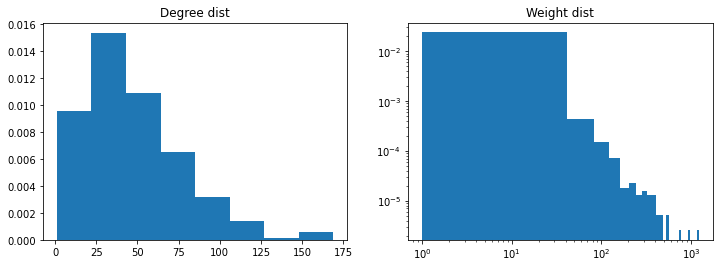

In [19]:
# Measuring original network

G = nm.build_nxgraph(dataset_paths[0], False) 
node_measures = ns.measure_nodes(G)
network_measures = ns.measure_network(G)

def print_dict(dict):
    for key in list(dict.keys()):
        print(key + ' : ' + str(dict[key]))
    print('\n')
        
print('Node measures')
print_dict(node_measures)
print('Network measures')
print_dict(network_measures)

degrees, weights = ns.analyse_graph(G)

figure, axis = plt.subplots(1, 2)
figure.set_figwidth(12)

axis[0].hist(degrees, bins = 8, density = 1)
axis[0].set_title('Degree dist')

axis[1].hist(weights, bins = 30, density = 1)
axis[1].set_title('Weight dist')
axis[1].set_xscale('log')
axis[1].set_yscale('log')
plt.show()

# Should also include plots of degree dist and weight dist

In [20]:
G['1467']['1591']['weight']

17

In [21]:
import scipy.stats as sps

dfit, dcov = ns.fit_degrees(degrees)

class degree_distribution(sps.rv_continuous): 
    def _pdf(self, x):
        return ns.degree_func(x, *dfit)

ddist = degree_distribution(a=0)
degree_samples = ddist.rvs(size = 500) # 1000 samples, 2.5x bigger for network[0]
degree_samples = np.ceil(degree_samples).astype(int)

print(sum(degree_samples))
if sum(degree_samples)%2 != 0:
    degree_samples = np.append(degree_samples, 35) # chose this as seems to be average from graph
print(sum(degree_samples))

H = nx.configuration_model(degree_samples, create_using = nx.Graph)
scale, scale_err = ns.optimize_scale(weights)
wfit, wcov = ns.fit_weights(weights, scale)
H = ns.set_weights(H, wfit)

/Users/ali/MSci Project/network_stats.py:98: RuntimeWarning: divide by zero encountered in true_divide
  return (x**a) / np.exp(b*x+c)
/Users/ali/MSci Project/network_stats.py:98: RuntimeWarning: overflow encountered in exp
  return (x**a) / np.exp(b*x+c)
/Users/ali/MSci Project/network_stats.py:98: RuntimeWarning: overflow encountered in double_scalars
  return (x**a) / np.exp(b*x+c)
/Users/ali/MSci Project/network_stats.py:98: RuntimeWarning: invalid value encountered in double_scalars
  return (x**a) / np.exp(b*x+c)
/Users/ali/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1837: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
/Users/ali/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in _cdf_single (vectorized)
 

24781
24816
  best scaling factor    best average error
---------------------  --------------------
                 1.97                  2.48
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin


In [22]:
len(degree_samples)

501

In [23]:
test = ns.sample_weights(10, wfit)
print(test)

[196.02146995 105.13544331  15.23875212  19.09230528  43.801307
  26.77863305  18.72017838  45.97865783  56.97285819 105.81921335]


Node measures
degree : 22.55688622754491
weight : 363.1094384123446
closeness : 245.57455926399996
betweenness : 0.9567935871743485
eigenvector : 19.21153237578423


Network measures
nodes : 501
edges : 11301
ratio : 22.55688622754491
components : 9
density : 0.09022754491017965
transitivity : 0.15946593551398833




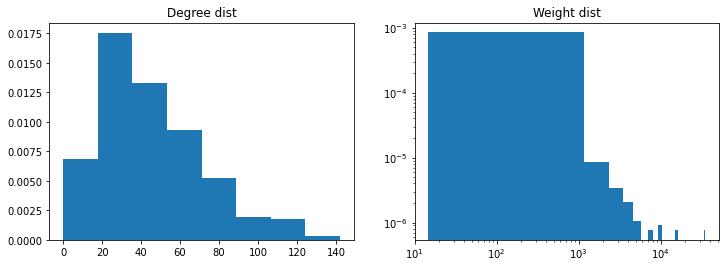

In [24]:
node_measures = ns.measure_nodes(H)
network_measures = ns.measure_network(H)

print('Node measures')
print_dict(node_measures)
print('Network measures')
print_dict(network_measures)

degrees, weights = ns.analyse_graph(H)

figure, axis = plt.subplots(1, 2)
figure.set_figwidth(12)

axis[0].hist(degrees, bins = 8, density = 1)
axis[0].set_title('Degree dist')

axis[1].hist(weights, bins = 30, density = 1)
axis[1].set_title('Weight dist')
axis[1].set_xscale('log')
axis[1].set_yscale('log')
plt.show()

In [25]:
nx.density(H)


0.09022754491017965

In [26]:
nx.average_shortest_path_length(H)

NetworkXError: Graph is not connected.

In [ ]:
nx.diameter(H)

NetworkXError: Found infinite path length because the graph is not connected

In [ ]:
nx.transitivity(H)

0.07972776995848849

0
1
2
3
4


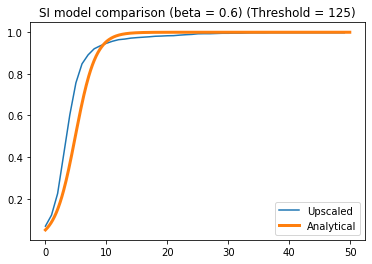

0
1
2
3
4


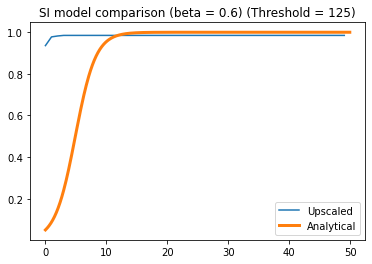

In [ ]:
import SI_model_nx as si

simulation_params = {}
simulation_params['Time'] = 50
simulation_params['Initial'] = 0.05
simulation_params['Beta'] = 0.6
simulation_params['Runs'] = 5
simulation_params['Threshold'] = 125
simulation_params['Increment'] = 0.1

si.SI_comparison(G, simulation_params, 'Original')

si.SI_comparison(H, simulation_params, 'Upscaled')